Assignment 04 
## Cross Validation, Grid search

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
X = df[['Pclass','SibSp','Parch','Fare']]
y = df.Survived

In [7]:
X.head()

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Logisitic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.7486033519553073
Confusion Matrix:
 [[102  14]
 [ 31  32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       116
           1       0.70      0.51      0.59        63

    accuracy                           0.75       179
   macro avg       0.73      0.69      0.70       179
weighted avg       0.74      0.75      0.74       179



 K-Fold Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score,KFold
model = LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(model,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.62569832 0.66853933 0.66853933 0.69662921 0.75280899]

Average of Cross Validation Scores: 0.6824430355909861


#KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier as knn
acc_val=[]
neighbors=np.arange(1,15)
for k in neighbors:
    classifier=knn(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

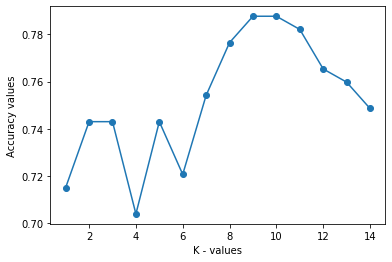

In [12]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(X_train,y_train)

y_pred = model_knn.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.7821229050279329
Confusion Matrix:
 [[101  15]
 [ 24  39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       116
           1       0.72      0.62      0.67        63

    accuracy                           0.78       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.78      0.78      0.78       179



K-Fold Cross Validation

In [14]:
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(model_knn,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.60893855 0.59550562 0.65168539 0.73033708 0.74157303]

Average of Cross Validation Scores: 0.6656079342163078


SVM

In [15]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear', C=1, gamma='auto')
model_svc.fit(X_train,y_train)

y_pred = model_svc.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.7597765363128491
Confusion Matrix:
 [[102  14]
 [ 29  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       116
           1       0.71      0.54      0.61        63

    accuracy                           0.76       179
   macro avg       0.74      0.71      0.72       179
weighted avg       0.75      0.76      0.75       179



K-Fold Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(model_svc,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.61452514 0.65730337 0.66292135 0.7247191  0.74719101]

Average of Cross Validation Scores: 0.6813319942250958


Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.7486033519553073
Confusion Matrix:
 [[97 19]
 [26 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       116
           1       0.66      0.59      0.62        63

    accuracy                           0.75       179
   macro avg       0.72      0.71      0.72       179
weighted avg       0.74      0.75      0.74       179



K-Fold Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(clf,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.67039106 0.63483146 0.69662921 0.70786517 0.7247191 ]

Average of Cross Validation Scores: 0.6868872010545478


Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators = 100)
rf_clf.fit(X_test,y_test)

y_pred = rf_clf.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.9385474860335196
Confusion Matrix:
 [[115   1]
 [ 10  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       116
           1       0.98      0.84      0.91        63

    accuracy                           0.94       179
   macro avg       0.95      0.92      0.93       179
weighted avg       0.94      0.94      0.94       179



K-Fold Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score,KFold

rf_clf = RandomForestClassifier(random_state=42, n_estimators = 100)
kf=KFold(n_splits=5)
score=cross_val_score(rf_clf,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.63687151 0.64044944 0.68539326 0.73595506 0.73033708]

Average of Cross Validation Scores: 0.6858012679681125


Hyper Parameter Tunning using Grid Search CV

In [21]:
search_space ={'C': [0.1, 1, 10, 100, 1000],
     'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(
    SVC(), 
    search_space, 
    cv=5,
    scoring='accuracy',n_jobs=-1)

In [22]:
grid_result = grid_search.fit(X_train,y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Best Score:  0.6825864276568502


In [23]:
model_svc = SVC(kernel='rbf', C=1000, gamma=0.1)
model_svc.fit(X_train,y_train)

y_pred = model_svc.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.7821229050279329
Confusion Matrix:
 [[103  13]
 [ 26  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       116
           1       0.74      0.59      0.65        63

    accuracy                           0.78       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.78      0.78      0.78       179



In [24]:
kf=KFold(n_splits=5)
score=cross_val_score(model_svc,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.67039106 0.63483146 0.75280899 0.70224719 0.7752809 ]

Average of Cross Validation Scores: 0.7071119201556713
